In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

# Масло

In [5]:
oil = pd.read_csv('oil.csv', parse_dates=['time'],dayfirst=True,delimiter=';',usecols=range(5))
oil['ExchangeRate']= (oil['open']+oil['close'])/2
oil.dropna(inplace=True)

In [6]:
# Задаем параметры SARIMA (p, d, q) x (P, D, Q, s)
order = (1, 1, 1)        # Параметры для не сезонной части
seasonal_order = (1, 1, 1, 12)  # Параметры для сезонной части

# Создание модели SARIMA
model = SARIMAX(oil['ExchangeRate'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Прогнозируем на 3 года вперед
forecast = model_fit.forecast(steps=36)  # 36 месяцев

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  6.39261D+00    |proj g|=  1.99081D-01

At iterate    5    f=  6.27745D+00    |proj g|=  1.01390D-02

At iterate   10    f=  6.27589D+00    |proj g|=  5.96650D-04

At iterate   15    f=  6.27554D+00    |proj g|=  1.33371D-02

At iterate   20    f=  6.24692D+00    |proj g|=  3.69403D-02


 This problem is unconstrained.



At iterate   25    f=  6.19800D+00    |proj g|=  2.49865D-02

At iterate   30    f=  6.19655D+00    |proj g|=  1.93614D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     32     38      1     0     0   6.850D-05   6.197D+00
  F =   6.1965493413010213     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [7]:
start_date = '2025-01-01'
fcc=pd.DataFrame(forecast)
forecast_dates = pd.date_range(start=start_date, periods=36, freq='MS')
forecast_dates = pd.DataFrame(forecast_dates)
forecast_dates.columns=['time']
forecast_dates
fcc=fcc.reset_index(drop=True)
forecast_dates['ExchangeRate']=fcc['predicted_mean']

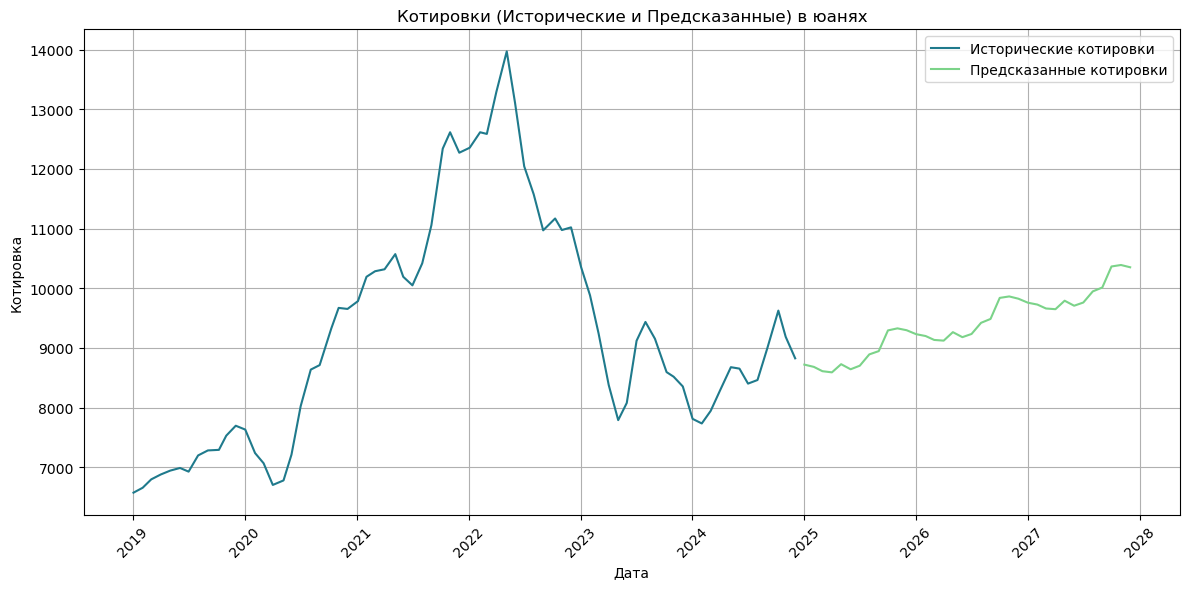

In [8]:
# График
plt.figure(figsize=(12, 6))

# Исторические данные
plt.plot(oil['time'], oil['ExchangeRate'], color='#1F7A8C', label='Исторические котировки')

# Предсказанные данные
plt.plot(forecast_dates['time'], forecast_dates['ExchangeRate'], color='#7BD389', label='Предсказанные котировки')

# Настройка графика
plt.title('Котировки (Исторические и Предсказанные) в юанях')
plt.xlabel('Дата')
plt.ylabel('Котировка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

# Показать график
plt.tight_layout()
plt.show()

In [9]:
aic = model_fit.aic
bic = model_fit.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 902.3031051473471
BIC: 912.6907923668757


In [10]:
forecast_dates.to_excel('result_oil.xlsx', index=False, engine='openpyxl')

# Жмых

In [12]:
meal = pd.read_csv('meal.csv', parse_dates=['time'],dayfirst=True,delimiter=';',usecols=range(5))
meal['ExchangeRate']= (meal['open']+meal['close'])/2
meal.dropna(inplace=True)

In [13]:
order = (1, 1, 1)        
seasonal_order = (1, 1, 1, 12) 

model = SARIMAX(meal['ExchangeRate'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=36) 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.31123D+00    |proj g|=  1.02178D-01

At iterate    5    f=  5.26642D+00    |proj g|=  1.09074D-02

At iterate   10    f=  5.26230D+00    |proj g|=  9.58171D-03

At iterate   15    f=  5.18160D+00    |proj g|=  1.70670D-02

At iterate   20    f=  5.18079D+00    |proj g|=  1.16002D-03


 This problem is unconstrained.



At iterate   25    f=  5.17204D+00    |proj g|=  1.04828D-01

At iterate   30    f=  5.15173D+00    |proj g|=  9.37929D-03

At iterate   35    f=  5.14979D+00    |proj g|=  1.87026D-02

At iterate   40    f=  5.14940D+00    |proj g|=  3.16280D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     41     59      1     0     0   1.245D-05   5.149D+00
  F =   5.1494015493907845     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             


In [14]:
fcc=pd.DataFrame(forecast)
forecast_dates = pd.date_range(start=start_date, periods=36, freq='MS')
forecast_dates = pd.DataFrame(forecast_dates)
forecast_dates.columns=['time']
forecast_dates
fcc=fcc.reset_index(drop=True)
forecast_dates['ExchangeRate']=fcc['predicted_mean']

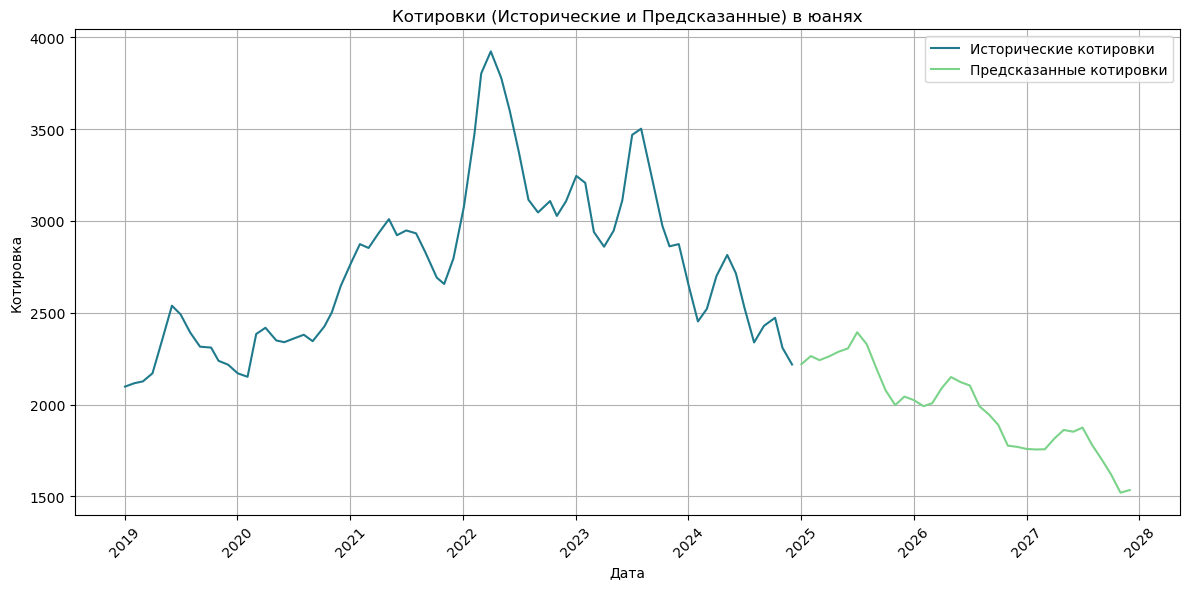

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(meal['time'], meal['ExchangeRate'], color='#1F7A8C', label='Исторические котировки')

plt.plot(forecast_dates['time'], forecast_dates['ExchangeRate'], color='#7BD389', label='Предсказанные котировки')

plt.title('Котировки (Исторические и Предсказанные) в юанях')
plt.xlabel('Дата')
plt.ylabel('Котировка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [16]:
aic = model_fit.aic
bic = model_fit.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 751.5138231122729
BIC: 761.9015103318015


In [17]:
forecast_dates.to_excel('result_meal.xlsx', index=False, engine='openpyxl')

# Курс Юань/Рубль

In [19]:
cny = pd.read_csv('cny_rub.csv', parse_dates=['time'],dayfirst=True,delimiter=';',usecols=range(5))
cny['ExchangeRate']= (cny['open']+cny['close'])/2
cny.dropna(inplace=True)

In [20]:
order = (1, 1, 1)        
seasonal_order = (1, 1, 1, 12) 

model = SARIMAX(cny['ExchangeRate'], order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

forecast = model_fit.forecast(steps=36) 

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.62472D-01    |proj g|=  2.12726D-01

At iterate    5    f=  7.66357D-01    |proj g|=  4.39781D-02

At iterate   10    f=  7.61472D-01    |proj g|=  1.74936D-03


/opt/anaconda3/lib/python3.12/site-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'
 This problem is unconstrained.



At iterate   15    f=  7.60863D-01    |proj g|=  4.20217D-03

At iterate   20    f=  7.60684D-01    |proj g|=  2.49248D-03

At iterate   25    f=  7.60658D-01    |proj g|=  6.25967D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     29     58      2     0     0   3.399D-05   7.607D-01
  F =  0.76065801717546333     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



 Bad direction in the line search;
   refresh the lbfgs memory and restart the iteration.


In [21]:
fcc=pd.DataFrame(forecast)
forecast_dates = pd.date_range(start=start_date, periods=36, freq='MS')
forecast_dates = pd.DataFrame(forecast_dates)
forecast_dates.columns=['time']
forecast_dates
fcc=fcc.reset_index(drop=True)
forecast_dates['ExchangeRate']=fcc['predicted_mean']

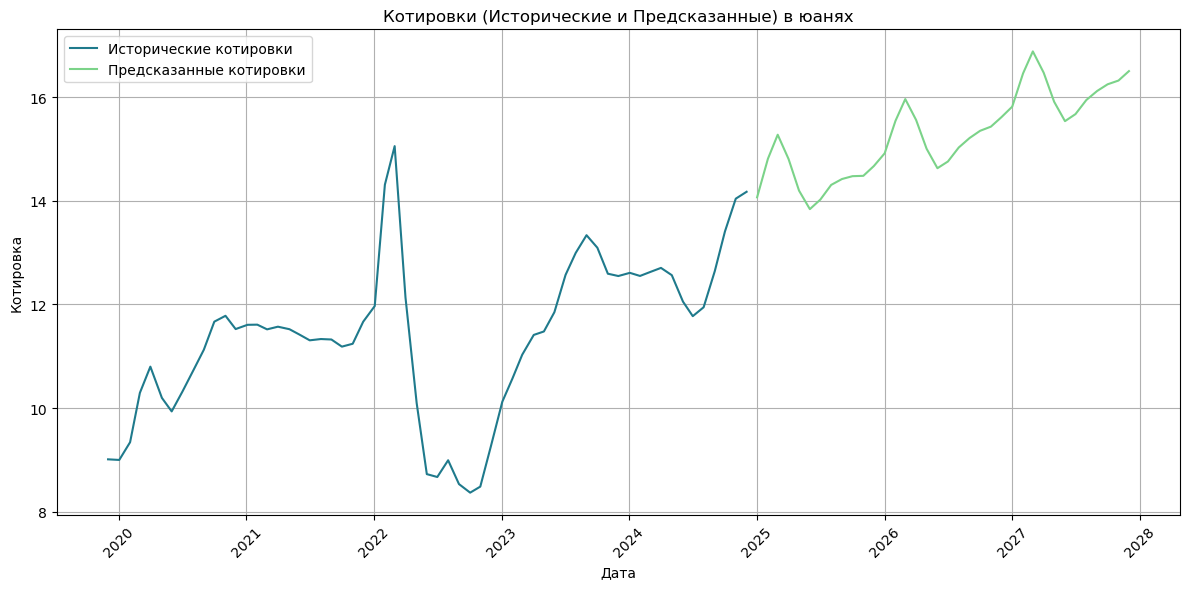

In [22]:
plt.figure(figsize=(12, 6))
plt.plot(cny['time'], cny['ExchangeRate'], color='#1F7A8C', label='Исторические котировки')

plt.plot(forecast_dates['time'], forecast_dates['ExchangeRate'], color='#7BD389', label='Предсказанные котировки')

plt.title('Котировки (Исторические и Предсказанные) в юанях')
plt.xlabel('Дата')
plt.ylabel('Котировка')
plt.xticks(rotation=45)
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

In [23]:
aic = model_fit.aic
bic = model_fit.bic

print(f"AIC: {aic}")
print(f"BIC: {bic}")

AIC: 102.80027809540653
BIC: 112.15628314994598


In [24]:
forecast_dates.to_excel('result_cny_rub.xlsx', index=False, engine='openpyxl')